# ===============================================
# 📊 DATA ANALYTICS WORKFLOW IN R
# ===============================================

# 1️⃣ Load Required Libraries
# Install packages if not already installed


install.packages("IRkernel")
IRkernel::installspec(user = TRUE)


install.packages("IRkernel")
IRkernel::installspec()  # Makes R available as a Jupyter kernel


packages <- c("tidyverse", "lubridate", "ggplot2", "dplyr")
installed <- packages %in% installed.packages()
if (any(!installed)) install.packages(packages[!installed])
library(tidyverse)
library(lubridate)

install.packages("readxl")
library(readxl)


# 2️⃣ Import Data
# Replace with your file path


In [1]:

df <- read.csv("car_prices.csv", stringsAsFactors = FALSE)

In [2]:
head(df)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5,16639,white,black,kia motors america inc,20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5,9393,white,beige,kia motors america inc,20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
3,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45,1331,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
4,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41,14282,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
5,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43,2641,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
6,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1,5554,gray,black,enterprise vehicle exchange / tra / rental / tulsa,15350,10900,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)


In [3]:
str(df)

'data.frame':	558837 obs. of  16 variables:
 $ year        : int  2015 2015 2014 2015 2014 2015 2014 2014 2014 2014 ...
 $ make        : chr  "Kia" "Kia" "BMW" "Volvo" ...
 $ model       : chr  "Sorento" "Sorento" "3 Series" "S60" ...
 $ trim        : chr  "LX" "LX" "328i SULEV" "T5" ...
 $ body        : chr  "SUV" "SUV" "Sedan" "Sedan" ...
 $ transmission: chr  "automatic" "automatic" "automatic" "automatic" ...
 $ vin         : chr  "5xyktca69fg566472" "5xyktca69fg561319" "wba3c1c51ek116351" "yv1612tb4f1310987" ...
 $ state       : chr  "ca" "ca" "ca" "ca" ...
 $ condition   : int  5 5 45 41 43 1 34 2 42 3 ...
 $ odometer    : int  16639 9393 1331 14282 2641 5554 14943 28617 9557 4809 ...
 $ color       : chr  "white" "white" "gray" "white" ...
 $ interior    : chr  "black" "beige" "black" "black" ...
 $ seller      : chr  "kia motors america  inc" "kia motors america  inc" "financial services remarketing (lease)" "volvo na rep/world omni" ...
 $ mmr         : int  20500 20800 31900 

In [4]:
summary(df)

      year          make              model               trim          
 Min.   :1982   Length:558837      Length:558837      Length:558837     
 1st Qu.:2007   Class :character   Class :character   Class :character  
 Median :2012   Mode  :character   Mode  :character   Mode  :character  
 Mean   :2010                                                           
 3rd Qu.:2013                                                           
 Max.   :2015                                                           
                                                                        
     body           transmission           vin               state          
 Length:558837      Length:558837      Length:558837      Length:558837     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                               

In [5]:
dim(df)

[1] 558837     16

In [6]:
names(df)

[1] "year"         "make"         "model"        "trim"         "body"        
 [6] "transmission" "vin"          "state"        "condition"    "odometer"    
[11] "color"        "interior"     "seller"       "mmr"          "sellingprice"
[16] "saledate"

# 4️⃣ Data Cleaning
# Example cleaning steps

# Handle missing values

In [7]:
colSums(is.na(df))   

year         make        model         trim         body transmission 
           0            0            0            0            0            0 
         vin        state    condition     odometer        color     interior 
           0            0        11820           94            0            0 
      seller          mmr sellingprice     saledate 
           0           38           12            0

In [12]:
# Group by 'make' and calculate total sales
sales_summary <- df %>%
  group_by(make) %>%
  summarise(total_sales = sum(sellingprice, na.rm = TRUE)) %>%
  arrange(desc(total_sales))


In [ ]:
library(dplyr)
library(ggplot2)


In [ ]:
ggplot(sales_summary, aes(x = reorder(make, -total_sales), y = total_sales)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(
    title = "Total Car Sales by Make",
    x = "Car Make",
    y = "Total Selling Price"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


In [ ]:


library(dplyr)
library(ggplot2)
library(readxl)

In [9]:
# Install if not already installed
install.packages("dplyr")  # only run once

# Load the package
library(dplyr)


Installing package into 'C:/Users/admin/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\admin\AppData\Local\Temp\RtmpETPtQ3\downloaded_packages



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




make,total_sales
<chr>,<int>
Ford,1360304557
Chevrolet,721003399
Nissan,633272955
Toyota,488392710
BMW,444254638
Mercedes-Benz,370083906


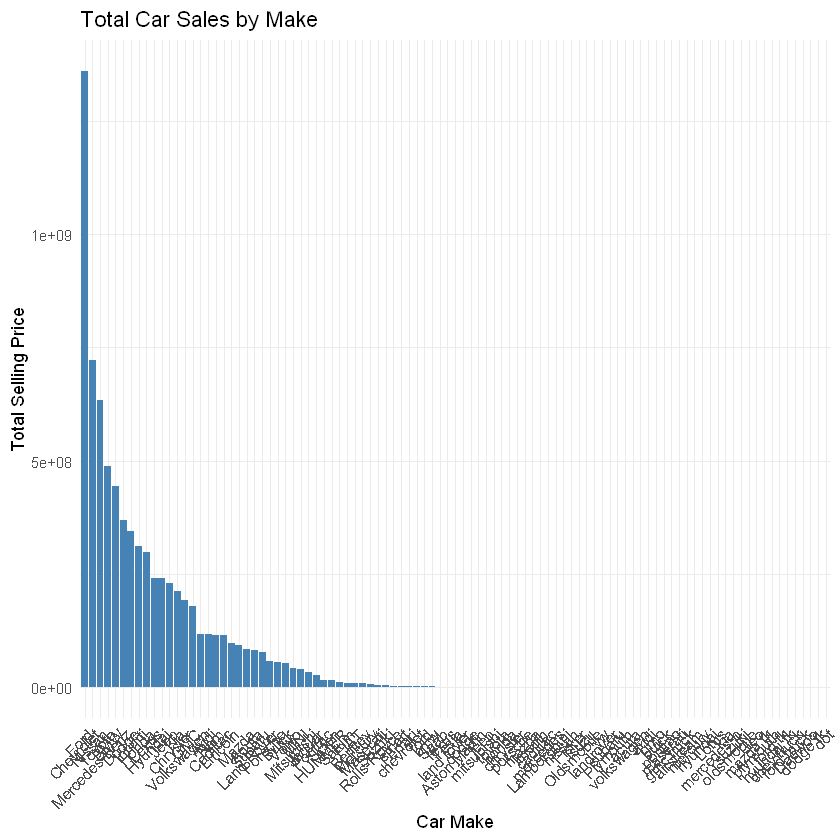

In [11]:
# Group by 'make' and calculate total sales
sales_summary <- df %>%
  group_by(make) %>%
  summarise(total_sales = sum(sellingprice, na.rm = TRUE)) %>%
  arrange(desc(total_sales))

# View summary
head(sales_summary)

# Plot
library(ggplot2)

ggplot(sales_summary, aes(x = reorder(make, -total_sales), y = total_sales)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Total Car Sales by Make",
       x = "Car Make", y = "Total Selling Price") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
